In [170]:
import geopandas as gpd
import pandas as pd

import matplotlib
%matplotlib inline


In [ ]:
# Load input data

In [212]:
christmas_markets = gpd.read_file('data/christmas_markets.geojson')

# Properties of christmas_markets
print (christmas_markets.columns)

# Geometry representation of christmas_markets
print (christmas_markets[['geometry']].head(5))

# Number of elements in christmas_markets
print (len(christmas_markets.index))

Index(['data', 'description', 'geometry', 'href', 'id', 'title'], dtype='object')
                      geometry
0  POINT (13.295946 52.519951)
1  POINT (13.335511 52.504886)
2  POINT (13.305994 52.509313)
3  POINT (13.259213 52.512538)
4    POINT (13.27725 52.48835)
82


In [213]:
print (christmas_markets['data'].apply(pd.Series)['name'].head(10))

0       Weihnachtsmarkt vor dem Schloss Charlottenburg
1          33. Weihnachtsmarkt an der Gedächtniskirche
2    Weihnachtsmarkt in der Fußgängerzone Wilmersdo...
3                               Weihnachten in Westend
4    Weihnachtsmarkt Berlin-Grunewald des Johannisc...
5                         Schwedischer Weihnachtsbasar
6                            Dänischer Weihnachtsmarkt
7          Weihnachtsmarkt rund um die Grunewaldkirche
8    Nikolausmarkt der Beschäftigungs- und Bildungs...
9            Christmas Fair / A very British Christmas
Name: name, dtype: object


In [ ]:
explore the dataset further (example methods/properties)

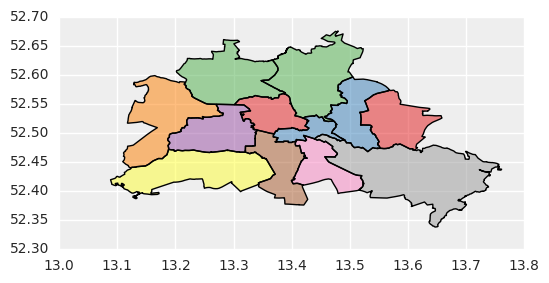

In [139]:
districts = gpd.read_file('data/districts.geojson')
districts.geometry.plot()

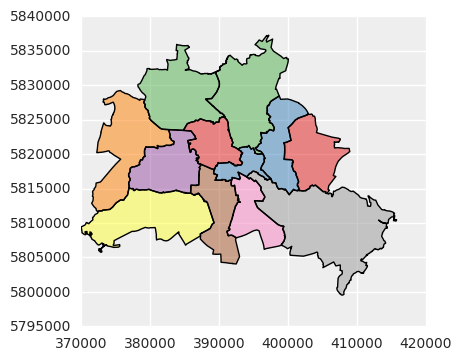

In [140]:
districts.to_crs(epsg=32633, inplace=True)
districts.geometry.plot()

In [181]:
christmas_markets.to_crs(epsg=32633, inplace=True)

In [182]:
districts['total_christmas_markets'] = districts.apply(
            lambda district: sum(christmas_markets.intersects(district.geometry)), axis=1)

In [183]:
print (districts[['Name', 'total_christmas_markets']].sort_values(by='total_christmas_markets', ascending=False))

                          Name  total_christmas_markets
5          Steglitz-Zehlendorf                       13
0                        Mitte                       11
3   Charlottenburg-Wilmersdorf                       11
6         Tempelhof-Schöneberg                        9
9          Marzahn-Hellersdorf                        7
7                     Neukölln                        6
8             Treptow-Köpenick                        6
11               Reinickendorf                        6
4                      Spandau                        5
1     Friedrichshain-Kreuzberg                        3
2                       Pankow                        3
10                 Lichtenberg                        2


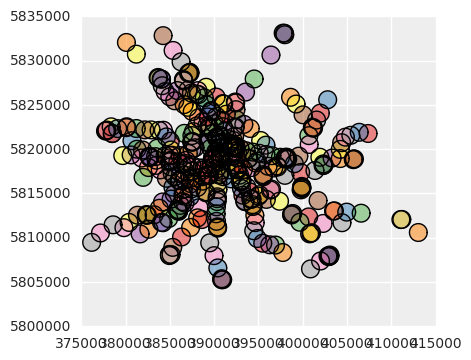

In [200]:
stops = gpd.read_file('data/stops.geojson')
stops.to_crs(epsg=32633, inplace=True)
stops_columns = list(stops.columns)   
stops_columns.remove('stop_name')         

stops_1000m_df = stops.copy().drop(stops_columns, axis=1)
stops_1000m_geometry = stops.buffer(distance=1000)

stops_1000m = gpd.GeoDataFrame(stops_1000m_df, geometry=stops_1000m_geometry)
stops_1000m.geometry.plot()

In [201]:
stops_1000m['total_christmas_markets'] = stops_1000m.apply(
            lambda stop_1000m: sum(christmas_markets.intersects(stop_1000m.geometry)), axis=1)
print (stops_1000m[
        ['stop_name', 'total_christmas_markets']].sort_values(by='total_christmas_markets', ascending=False).head(10))

                                        stop_name  total_christmas_markets
268   S+U Alexanderplatz Bhf/Memhardstr. (Berlin)                        5
276              S+U Alexanderplatz (Berlin) [U2]                        5
264  S+U Alexanderplatz Bhf/Dircksenstr. (Berlin)                        5
247              U Alexanderplatz (Berlin) [Tram]                        5
265                S+U Brandenburger Tor (Berlin)                        5
266   S+U Alexanderplatz Bhf/Gontardstr. (Berlin)                        5
251                         U Mohrenstr. (Berlin)                        5
244                   S Hackescher Markt (Berlin)                        5
245               S+U Alexanderplatz Bhf (Berlin)                        5
277              S+U Alexanderplatz (Berlin) [U5]                        5


In [230]:
address = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          13.515404462814331,
          52.45574787847177
        ]
      }
    }
  ]
}
home_df = gpd.GeoDataFrame.from_features(address['features'], crs= {'init' :'epsg:4326'})
home_df.to_crs(epsg=32633, inplace=True)

# Task: get the coordinates of your home and convert them to a GeoDataFrame
# Which is the closest christmas market and how far is it away?

# Hints: You can use for example geojson.io to get a point geoemtry in GeoJSON format or http://www.geoplaner.com/ to get the coordinates directly in the correct UTM zone
# Don't forget to reproject the data so that you get meaningful distance values.  

In [240]:
christmas_markets.to_crs(epsg=32633, inplace=True)

christmas_markets['distance_home'] = christmas_markets.apply(
            lambda christmas_market: (christmas_market.geometry.distance(home_df.iloc[0].geometry)/1000), axis=1)
print (christmas_markets[
        ['distance_home', 'data']].sort_values(by='distance_home').head(10))

    distance_home                                               data
79       0.980608  {'bemerkungen': 'Weitere Informationen auf der...
76       2.837923  {'bemerkungen': 'Eintritt 3 €, Kinder bis 16 J...
15       3.126083  {'bemerkungen': '', 'plz_ort': '10318 Berlin',...
81       4.099884  {'bemerkungen': 'Weitere Informationen auf der...
77       4.201075  {'bemerkungen': '', 'plz_ort': '12555 Berlin',...
39       4.659636  {'bemerkungen': 'Eintritt frei', 'plz_ort': '1...
38       5.186196  {'bemerkungen': '', 'plz_ort': '12055 Berlin',...
34       5.363701  {'bemerkungen': 'Eintritt 3 €, ermäßigt 2 €, K...
37       5.396730  {'bemerkungen': '10:00 Festlicher Gottesdienst...
35       6.681115  {'bemerkungen': 'Eintritt frei', 'plz_ort': '1...
